In [44]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.ndimage import convolve

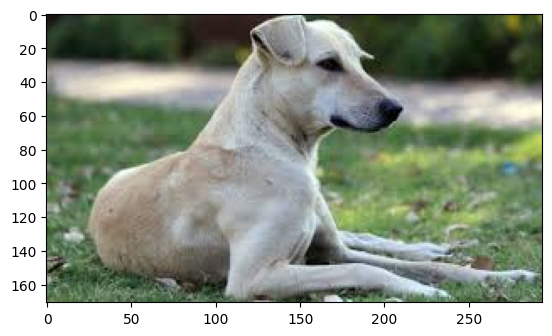

In [45]:
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Sobel Filter for Detecting Vertical and Horizontal Edges

The Sobel filter is used to detect vertical and horizontal edges in an image. It works by calculating the gradient of the image intensity at each pixel within the image. This gradient calculation highlights regions of high spatial frequency, which correspond to edges.

The Sobel filter uses two kernels, one for detecting changes in the horizontal direction and one for detecting changes in the vertical direction. The kernels are convolved with the image to produce the gradient magnitude in each direction.

- **Horizontal Kernel (Gx):**
    ```
    [-1, 0, 1]
    [-2, 0, 2]
    [-1, 0, 1]
    ```

- **Vertical Kernel (Gy):**
    ```
    [-1, -2, -1]
    [ 0,  0,  0]
    [ 1,  2,  1]
    ```

The final gradient magnitude is computed as:Sobel filter for detecting verticle and horizontal edges

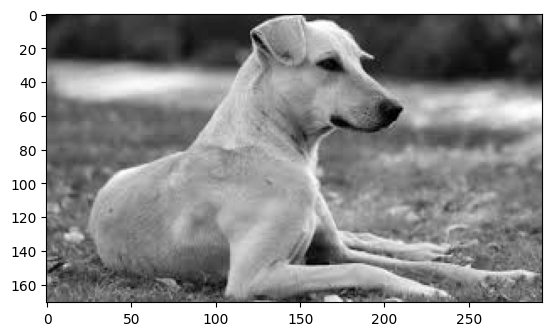

In [46]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

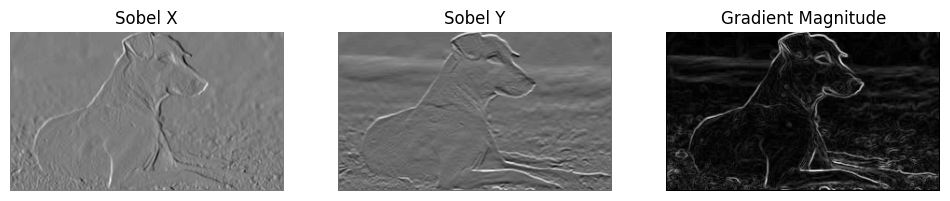

In [47]:


# Define Sobel kernels (hardcoded)
sobel_x_kernel = np.array([[-1, 0, 1], 
                            [-2, 0, 2], 
                            [-1, 0, 1]], dtype=np.float32)

sobel_y_kernel = np.array([[-1, -2, -1], 
                            [0,  0,  0], 
                            [1,  2,  1]], dtype=np.float32)

height, width = gray_img.shape

# Initialize output images
sobel_x = np.zeros((height, width), dtype=np.float32)
sobel_y = np.zeros((height, width), dtype=np.float32)

# Manually apply convolution (ignore borders for simplicity)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        region = gray_img[i-1:i+2, j-1:j+2]  # 3x3 region
        sobel_x[i, j] = np.sum(region * sobel_x_kernel)
        sobel_y[i, j] = np.sum(region * sobel_y_kernel)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = (sobel_magnitude / np.max(sobel_magnitude)) * 255  # Normalize to 0-255
sobel_magnitude = sobel_magnitude.astype(np.uint8)



# Display the result
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

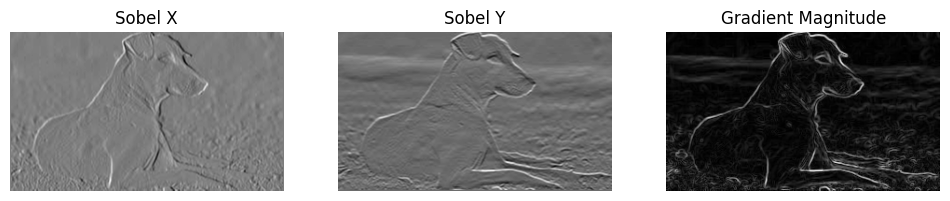

In [48]:
# Apply Sobel filter using OpenCV
sobel_x_cv = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_cv = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
edges_cv = cv2.magnitude(sobel_x_cv, sobel_y_cv)

# Normalize the result to the range [0, 255]
edges_cv = cv2.normalize(edges_cv, None, 0, 255, cv2.NORM_MINMAX)
edges_cv = edges_cv.astype(np.uint8)


# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x_cv, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y_cv, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges_cv, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

In [49]:
# Print the steps and Sobel kernels
print("Steps to apply Sobel filter:")
print("1. Convert the image to grayscale.")
print("2. Define the Sobel kernels:")
print("   - Horizontal Kernel (Gx):")
print("     [-1, 0, 1]")
print("     [-2, 0, 2]")
print("     [-1, 0, 1]")
print("   - Vertical Kernel (Gy):")
print("     [-1, -2, -1]")
print("     [ 0,  0,  0]")
print("     [ 1,  2,  1]")
print("3. Convolve the image with the Sobel kernels to get edges_x and edges_y.")
print("4. Compute the gradient magnitude: edges = sqrt(edges_x^2 + edges_y^2).")
print("5. Normalize the gradient magnitude to the range [0, 255].")

Steps to apply Sobel filter:
1. Convert the image to grayscale.
2. Define the Sobel kernels:
   - Horizontal Kernel (Gx):
     [-1, 0, 1]
     [-2, 0, 2]
     [-1, 0, 1]
   - Vertical Kernel (Gy):
     [-1, -2, -1]
     [ 0,  0,  0]
     [ 1,  2,  1]
3. Convolve the image with the Sobel kernels to get edges_x and edges_y.
4. Compute the gradient magnitude: edges = sqrt(edges_x^2 + edges_y^2).
5. Normalize the gradient magnitude to the range [0, 255].


### Apply Canny Filter for Edge Detection

The Canny filter is a multi-stage edge detection algorithm that is widely used in image processing. It aims to detect a wide range of edges in images.

The steps involved in the Canny filter are:
1. **Noise Reduction**: Apply a Gaussian filter to smooth the image and reduce noise.
2. **Gradient Calculation**: Compute the intensity gradients of the image.
3. **Non-maximum Suppression**: Thin out the edges by suppressing non-maximum gradient values.
4. **Double Thresholding**: Apply a double threshold to determine potential edges.
5. **Edge Tracking by Hysteresis**: Finalize the detection of edges by suppressing all edges that are not connected to strong edges.

The Canny filter is known for its optimal edge detection performance, providing good detection, localization, and minimal response to noise.

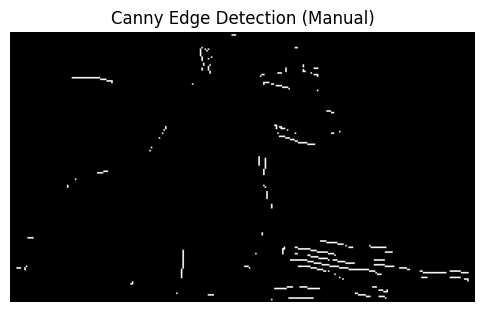

In [50]:

# Manually apply Canny filter (hardcoded)
def manual_canny(image, low_threshold, high_threshold):
    # Step 1: Noise Reduction (Gaussian Blur)
    blurred_img = cv2.GaussianBlur(image, (5, 5), 1.4)
    
    # Step 2: Gradient Calculation (using Sobel)
    sobel_x = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_direction = np.arctan2(sobel_y, sobel_x)
    
    # Step 3: Non-maximum Suppression
    nms_img = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    angle = gradient_direction * 180. / np.pi
    angle[angle < 0] += 180
    
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            try:
                q = 255
                r = 255
                
                # Angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = gradient_magnitude[i, j + 1]
                    r = gradient_magnitude[i, j - 1]
                # Angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = gradient_magnitude[i + 1, j - 1]
                    r = gradient_magnitude[i - 1, j + 1]
                # Angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = gradient_magnitude[i + 1, j]
                    r = gradient_magnitude[i - 1, j]
                # Angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = gradient_magnitude[i - 1, j - 1]
                    r = gradient_magnitude[i + 1, j + 1]
                
                if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                    nms_img[i, j] = gradient_magnitude[i, j]
                else:
                    nms_img[i, j] = 0
            except IndexError as e:
                pass
    
    # Step 4: Double Thresholding
    strong = 255
    weak = 75
    res_img = np.zeros_like(nms_img, dtype=np.uint8)
    
    strong_i, strong_j = np.where(nms_img >= high_threshold)
    weak_i, weak_j = np.where((nms_img <= high_threshold) & (nms_img >= low_threshold))
    
    res_img[strong_i, strong_j] = strong
    res_img[weak_i, weak_j] = weak
    
    # Step 5: Edge Tracking by Hysteresis
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if (res_img[i, j] == weak):
                if ((res_img[i + 1, j - 1] == strong) or (res_img[i + 1, j] == strong) or (res_img[i + 1, j + 1] == strong)
                    or (res_img[i, j - 1] == strong) or (res_img[i, j + 1] == strong)
                    or (res_img[i - 1, j - 1] == strong) or (res_img[i - 1, j] == strong) or (res_img[i - 1, j + 1] == strong)):
                    res_img[i, j] = strong
                else:
                    res_img[i, j] = 0
    
    return res_img

# Apply manual Canny filter
edges_canny_manual = manual_canny(gray_img, 100, 200)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny_manual, cmap='gray')
plt.title('Canny Edge Detection (Manual)')
plt.axis('off')
plt.show()

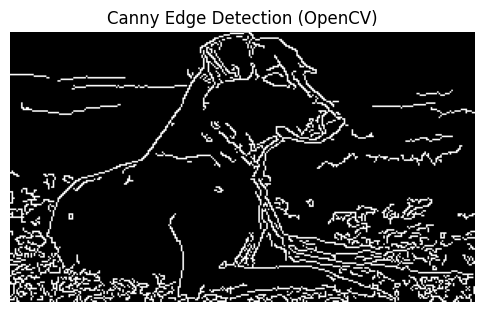

In [51]:
# Apply Canny filter using OpenCV
edges_canny_cv = cv2.Canny(gray_img, 100, 200)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(edges_canny_cv, cmap='gray')
plt.title('Canny Edge Detection (OpenCV)')
plt.axis('off')
plt.show()

### Explore and Use Laplacian Filter

The Laplacian filter is a second-order derivative filter used in image processing to detect edges. It highlights regions of rapid intensity change and is therefore often used for edge detection.

The Laplacian filter uses a single kernel that approximates the second derivative of the image intensity. The kernel is convolved with the image to produce the Laplacian of the image.

- **Laplacian Kernel:**
    ```
    [ 0, -1,  0]
    [-1,  4, -1]
    [ 0, -1,  0]
    ```

The Laplacian filter is sensitive to noise, so it is often applied to a smoothed image (e.g., using a Gaussian filter) to reduce the effect of noise before edge detection.

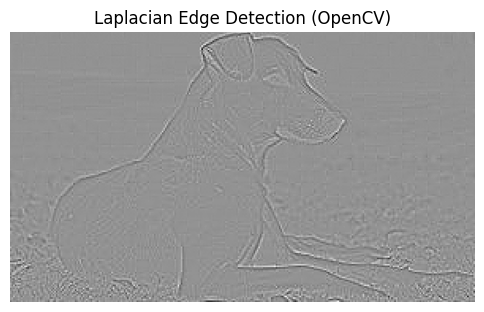

In [52]:
# Apply Laplacian filter using OpenCV
laplacian_cv = cv2.Laplacian(gray_img, cv2.CV_64F)

# Normalize the result to the range [0, 255]
laplacian_cv = cv2.normalize(laplacian_cv, None, 0, 255, cv2.NORM_MINMAX)
laplacian_cv = laplacian_cv.astype(np.uint8)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(laplacian_cv, cmap='gray')
plt.title('Laplacian Edge Detection (OpenCV)')
plt.axis('off')
plt.show()

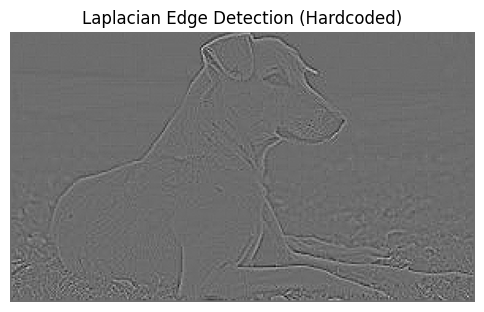

In [53]:

# Define the Laplacian kernel (hardcoded)
laplacian_kernel = np.array([[ 0, -1,  0], 
                             [-1,  4, -1], 
                             [ 0, -1,  0]])

# Get image dimensions
height, width = gray_img.shape

# Initialize the output image
edges = np.zeros((height, width), dtype=np.float32)

# Apply Laplacian filter manually (ignoring borders)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        # Extract 3x3 region
        region = gray_img[i-1:i+2, j-1:j+2]
        
        # Compute convolution manually
        edges[i, j] = np.sum(region * laplacian_kernel)

# Normalize to 0-255 range
edges = (edges - edges.min()) / (edges.max() - edges.min()) * 255
edges = edges.astype(np.uint8)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Laplacian Edge Detection (Hardcoded)')
plt.axis('off')
plt.show()


### Explore and Use Harris Corner Detector

The Harris Corner Detector is an algorithm used to detect corners in an image. It is based on the differential of the corner score with respect to direction, and it is known for its strong invariance to rotation, scale, and illumination changes.

The steps involved in the Harris Corner Detector are:
1. **Compute the Gradient of the Image**: Calculate the image gradients Ix and Iy using a Sobel filter.
2. **Compute the Products of Gradients**: Calculate Ix^2, Iy^2, and IxIy.
3. **Compute the Sum of Products of Gradients**: Apply a Gaussian filter to the gradient products to get Sx^2, Sy^2, and Sxy.
4. **Compute the Harris Response Matrix**: Use the determinant and trace of the matrix to compute the response.
5. **Thresholding**: Apply a threshold to the response to detect corners.

The Harris Corner Detector is widely used in computer vision applications for feature detection and matching.

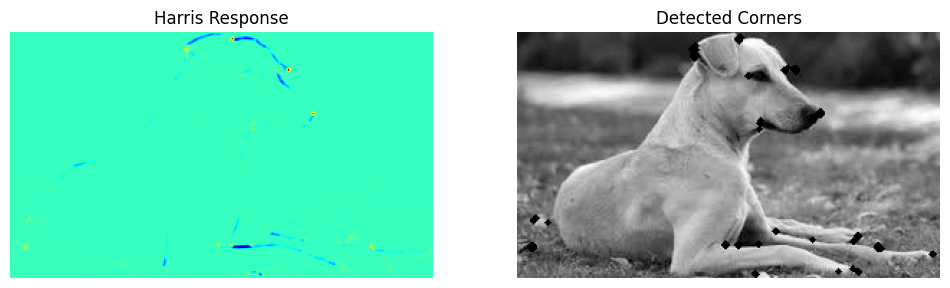

In [54]:

gray = gray_img.astype(np.float32)

# Define Sobel kernels for gradient computation
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1], 
                     [ 0,  0,  0], 
                     [ 1,  2,  1]], dtype=np.float32)

# Get image dimensions
height, width = gray.shape

# Compute gradients manually
I_x = np.zeros((height, width), dtype=np.float32)
I_y = np.zeros((height, width), dtype=np.float32)

for i in range(1, height - 1):
    for j in range(1, width - 1):
        region = gray[i-1:i+2, j-1:j+2]
        I_x[i, j] = np.sum(region * sobel_x)
        I_y[i, j] = np.sum(region * sobel_y)

# Compute products of gradients
I_x2 = I_x ** 2
I_y2 = I_y ** 2
I_xy = I_x * I_y

# Apply Gaussian smoothing to reduce noise
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]], dtype=np.float32)

def apply_filter(image, kernel):
    """Manually applies a convolution filter (Gaussian smoothing)."""
    filtered = np.zeros_like(image, dtype=np.float32)
    h, w = image.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            region = image[i-1:i+2, j-1:j+2]
            filtered[i, j] = np.sum(region * kernel)
    return filtered

# Smooth gradient products
S_xx = apply_filter(I_x2, gaussian_kernel)
S_yy = apply_filter(I_y2, gaussian_kernel)
S_xy = apply_filter(I_xy, gaussian_kernel)

# Compute Harris response R
k = 0.04
R = (S_xx * S_yy - S_xy ** 2) - k * (S_xx + S_yy) ** 2

# Normalize R for visualization
R_norm = (R - R.min()) / (R.max() - R.min()) * 255
R_norm = R_norm.astype(np.uint8)

# Mark strong corners on the original image
threshold = 0.1 * R.max()
corner_image = gray_img.copy()
for i in range(height):
    for j in range(width):
        if R[i, j] > threshold:
            cv2.circle(corner_image, (j, i), 2, (0, 0, 255), -1)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(R_norm, cmap='jet')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.axis('off')

plt.show()


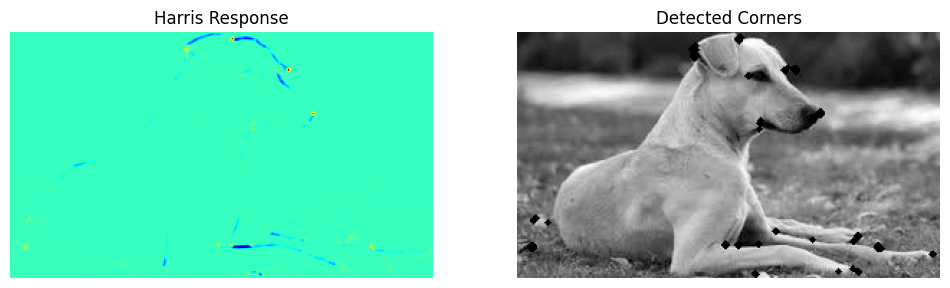

In [55]:

# Define Sobel kernels for gradient computation
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1], 
                     [ 0,  0,  0], 
                     [ 1,  2,  1]], dtype=np.float32)

# Get image dimensions
height, width = gray.shape

# Compute gradients manually
I_x = np.zeros((height, width), dtype=np.float32)
I_y = np.zeros((height, width), dtype=np.float32)

for i in range(1, height - 1):
    for j in range(1, width - 1):
        region = gray[i-1:i+2, j-1:j+2]
        I_x[i, j] = np.sum(region * sobel_x)
        I_y[i, j] = np.sum(region * sobel_y)

# Compute products of gradients
I_x2 = I_x ** 2
I_y2 = I_y ** 2
I_xy = I_x * I_y

# Apply Gaussian smoothing to reduce noise
gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]], dtype=np.float32)

def apply_filter(image, kernel):
    """Manually applies a convolution filter (Gaussian smoothing)."""
    filtered = np.zeros_like(image, dtype=np.float32)
    h, w = image.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            region = image[i-1:i+2, j-1:j+2]
            filtered[i, j] = np.sum(region * kernel)
    return filtered

# Smooth gradient products
S_xx = apply_filter(I_x2, gaussian_kernel)
S_yy = apply_filter(I_y2, gaussian_kernel)
S_xy = apply_filter(I_xy, gaussian_kernel)

# Compute Harris response R
k = 0.04
R = (S_xx * S_yy - S_xy ** 2) - k * (S_xx + S_yy) ** 2

# Normalize R for visualization
R_norm = (R - R.min()) / (R.max() - R.min()) * 255
R_norm = R_norm.astype(np.uint8)

# Mark strong corners on the original image
threshold = 0.1 * R.max()
corner_image = gray_img.copy()
for i in range(height):
    for j in range(width):
        if R[i, j] > threshold:
            cv2.circle(corner_image, (j, i), 2, (0, 0, 255), -1)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(R_norm, cmap='jet')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.axis('off')

plt.show()


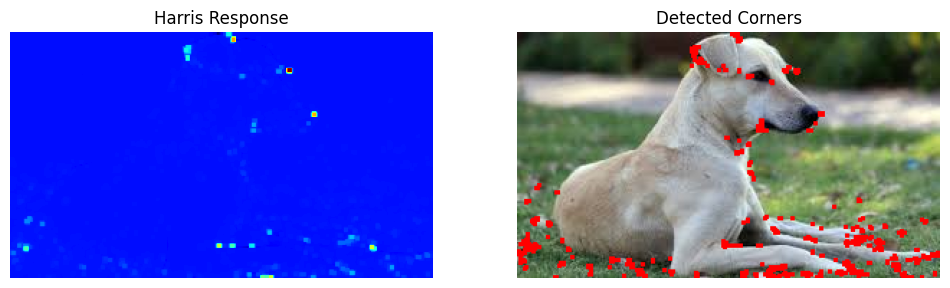

In [56]:

# Load and convert image to grayscale
image = cv2.imread('dog.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detector
gray = np.float32(gray)  # Convert to float32 for cornerHarris
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate result for better visibility
dst = cv2.dilate(dst, None)

# Threshold to mark strong corners
threshold = 0.01 * dst.max()
corner_image = image.copy()
corner_image[dst > threshold] = [0, 0, 255]  # Mark corners in red

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(dst, cmap='jet')
plt.title('Harris Response')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners')
plt.axis('off')

plt.show()


### Explore and Use SIFT (Scale-Invariant Feature Transform)

The Scale-Invariant Feature Transform (SIFT) is an algorithm used to detect and describe local features in images. It is widely used in computer vision for tasks such as object recognition, image stitching, and 3D reconstruction.

The steps involved in the SIFT algorithm are:
1. **Scale-space Extrema Detection**: Identify potential keypoints by searching for local extrema in a series of Gaussian-blurred images.
2. **Keypoint Localization**: Refine the keypoint locations by fitting a detailed model to determine the precise position, scale, and contrast.
3. **Orientation Assignment**: Assign an orientation to each keypoint based on the local image gradient directions.
4. **Keypoint Descriptor**: Generate a descriptor for each keypoint by computing the gradient magnitude and orientation in the region around the keypoint.
5. **Keypoint Matching**: Match keypoints between different images using the descriptors.

SIFT is known for its robustness to changes in scale, rotation, and illumination, making it a powerful tool for feature detection and matching.

### Information about SIFT (Scale-Invariant Feature Transform)

The Scale-Invariant Feature Transform (SIFT) is an algorithm used to detect and describe local features in images. It is widely used in computer vision for tasks such as object recognition, image stitching, and 3D reconstruction.

#### Steps Involved in the SIFT Algorithm:
1. **Scale-space Extrema Detection**:
    - Identify potential keypoints by searching for local extrema in a series of Gaussian-blurred images.
    - This is done by constructing a scale space and detecting extrema in the Difference of Gaussian (DoG) images.

2. **Keypoint Localization**:
    - Refine the keypoint locations by fitting a detailed model to determine the precise position, scale, and contrast.
    - Keypoints with low contrast or poorly localized along an edge are discarded.

3. **Orientation Assignment**:
    - Assign an orientation to each keypoint based on the local image gradient directions.
    - This step ensures that the keypoint descriptor is invariant to image rotation.

4. **Keypoint Descriptor**:
    - Generate a descriptor for each keypoint by computing the gradient magnitude and orientation in the region around the keypoint.
    - The descriptor is typically a 128-dimensional vector that is robust to changes in illumination and viewpoint.

5. **Keypoint Matching**:
    - Match keypoints between different images using the descriptors.
    - This is often done using a nearest-neighbor approach, with additional steps to filter out false matches.

#### Advantages of SIFT:
- **Scale Invariance**: SIFT can detect features at different scales, making it robust to changes in image size.
- **Rotation Invariance**: The orientation assignment step ensures that the descriptors are invariant to image rotation.
- **Robustness to Illumination Changes**: The gradient-based descriptors are less affected by changes in lighting conditions.
- **Distinctive Descriptors**: The 128-dimensional descriptors provide a rich representation of the local image structure, enabling reliable matching.

SIFT is a powerful tool for feature detection and matching, and it has been widely adopted in various computer vision applications.

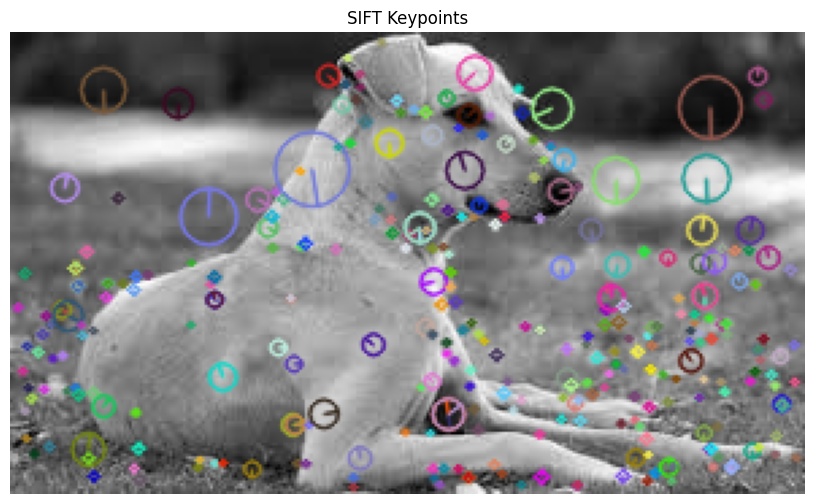

In [57]:
# Create a SIFT detector object
sift = cv2.SIFT_create()

# Detect SIFT keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray_img, None)

# Draw keypoints on the image
img_sift = cv2.drawKeypoints(gray_img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the result
plt.figure(figsize=(12, 6))
plt.imshow(img_sift, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

### Apply Various Filter Banks to Detect Texture in the Image

Filter banks are used to detect and analyze textures in images. They consist of multiple filters, each designed to capture different aspects of the texture. By applying these filters to an image, we can extract texture features that are useful for various image processing tasks.

#### Commonly Used Filter Banks:
1. **Gabor Filter Bank**:
    - Gabor filters are used to capture texture information at different scales and orientations.
    - They are particularly effective for texture analysis and segmentation.

2. **Laws' Texture Energy Measures**:
    - Laws' filters are designed to capture texture energy in different directions and scales.
    - They are useful for texture classification and segmentation.

3. **Wavelet Transform**:
    - Wavelet transforms decompose an image into different frequency components.
    - They are effective for multi-resolution texture analysis.

4. **Leung-Malik (LM) Filter Bank**:
    - The LM filter bank consists of a set of filters designed to capture various texture patterns.
    - It includes edge, bar, and spot filters at multiple scales and orientations.

#### Steps to Apply Filter Banks:
1. **Select the Filter Bank**: Choose the appropriate filter bank based on the texture characteristics you want to capture.
2. **Apply Filters**: Convolve the image with each filter in the filter bank.
3. **Extract Features**: Compute texture features from the filtered images.
4. **Analyze Texture**: Use the extracted features for texture analysis, classification, or segmentation.

By applying various filter banks, we can effectively detect and analyze textures in images, enabling more robust image processing and computer vision applications.

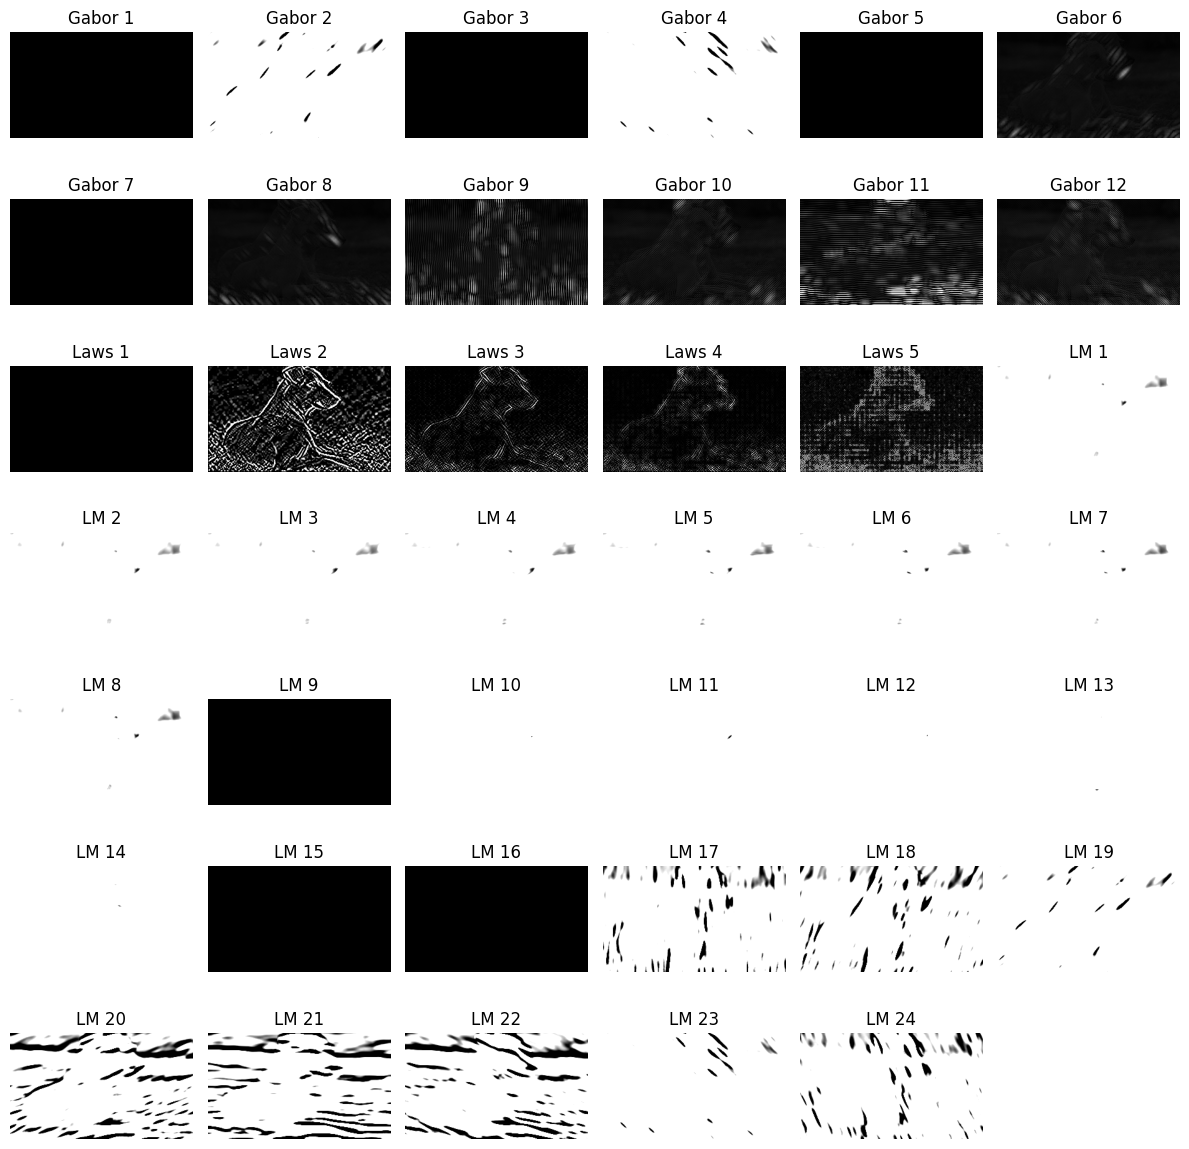

In [58]:
# Function to apply Gabor filters
def apply_gabor_filters(image, frequencies, orientations):
    gabor_responses = []
    for frequency in frequencies:
        for theta in orientations:
            kernel = cv2.getGaborKernel((21, 21), 4.0, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
            filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            gabor_responses.append(filtered_img)
    return gabor_responses

# Function to apply Laws' texture energy measures
def apply_laws_filters(image):
    laws_kernels = [
        np.array([[1, 4, 6, 4, 1]]).T @ np.array([[1, 4, 6, 4, 1]]),  # L5L5
        np.array([[-1, -2, 0, 2, 1]]).T @ np.array([[-1, -2, 0, 2, 1]]),  # E5E5
        np.array([[-1, 0, 2, 0, -1]]).T @ np.array([[-1, 0, 2, 0, -1]]),  # S5S5
        np.array([[-1, 2, 0, -2, 1]]).T @ np.array([[-1, 2, 0, -2, 1]]),  # W5W5
        np.array([[1, -4, 6, -4, 1]]).T @ np.array([[1, -4, 6, -4, 1]])   # R5R5
    ]
    laws_responses = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in laws_kernels]
    return laws_responses

# Function to apply Leung-Malik (LM) filter bank
def apply_lm_filters(image):
    lm_kernels = []
    for scale in [1, 2, 4]:
        for orientation in range(8):
            theta = np.pi * orientation / 8
            kernel = cv2.getGaborKernel((21, 21), scale, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            lm_kernels.append(kernel)
    lm_responses = [cv2.filter2D(image, cv2.CV_8UC3, kernel) for kernel in lm_kernels]
    return lm_responses

# Apply Gabor filters
frequencies = [0.1, 0.2, 0.3]
orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
gabor_responses = apply_gabor_filters(gray_img, frequencies, orientations)

# Apply Laws' texture energy measures
laws_responses = apply_laws_filters(gray_img)

# Apply Leung-Malik (LM) filter bank
lm_responses = apply_lm_filters(gray_img)

# Display the results
total_responses = len(gabor_responses) + len(laws_responses) + len(lm_responses)
cols = 6
rows = (total_responses // cols) + (total_responses % cols > 0)

plt.figure(figsize=(12, 12))

# Display Gabor filter responses
for i, response in enumerate(gabor_responses):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(response, cmap='gray')
    plt.title(f'Gabor {i+1}')
    plt.axis('off')

# Display Laws' filter responses
for i, response in enumerate(laws_responses):
    plt.subplot(rows, cols, i + 1 + len(gabor_responses))
    plt.imshow(response, cmap='gray')
    plt.title(f'Laws {i+1}')
    plt.axis('off')

# Display LM filter responses
for i, response in enumerate(lm_responses):
    plt.subplot(rows, cols, i + 1 + len(gabor_responses) + len(laws_responses))
    plt.imshow(response, cmap='gray')
    plt.title(f'LM {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Image Classification Task

Assuming that your task is to classify images into three classes:

1. **Extract Features from the Image**:
    - Use various feature extraction techniques to capture important information from the images.

2. **Download Simple Image Set**:
    - Obtain a simple image dataset to work with.
    - Apply the feature extraction techniques to this dataset.